In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
Y_train = pd.read_csv('../data/Y_train.csv')
Y_test = pd.read_csv('../data/Y_test.csv')

FS_DT = pd.read_csv('../data/FS_decision_tree.csv').values.flatten()
FS_RF = pd.read_csv('../data/FS_random_forest.csv').values.flatten()

# Decision Tree Regression

Alleniamo il modello e illustriamo in un grafico l'andamento del Mean Squared Error del dataset di train e del dataset di test al variare dell'iper-parametro max_leaf_nodes del modello DecisionTreeRegressor.

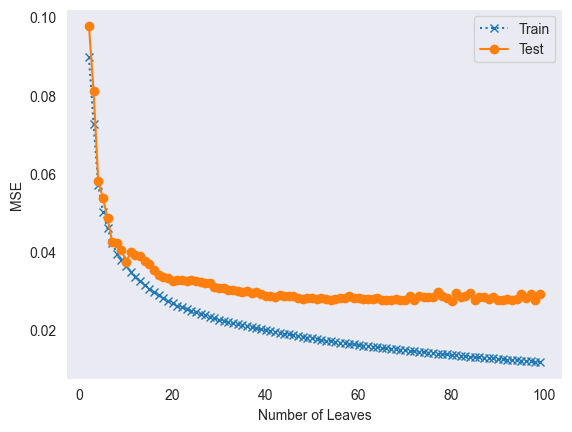

In [43]:
errors = []

for max_leaves in range(2,100):
    # train and predict
    dt = DecisionTreeRegressor(max_leaf_nodes=max_leaves)
    dt.fit(X_train,Y_train)

    # compute Accuracy
    train_acc = mean_squared_error(y_true=Y_train, y_pred=dt.predict(X_train))
    test_acc  = mean_squared_error(y_true=Y_test,  y_pred=dt.predict(X_test))

    errors += [ [max_leaves, train_acc, test_acc] ]

errors = np.array(errors)

fig, ax = plt.subplots()
ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
ax.set_ylabel("MSE")
ax.set_xlabel("Number of Leaves")
ax.grid()
ax.legend();

# Tuning dei parametri e cross validation

In [44]:
parameters = {'criterion': ['squared_error', 'friedman_mse'],
              'max_depth': [None, 50, 60, 100],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1, 2, 3],
              'max_leaf_nodes': [None, 20, 50, 70, 100]}

dt = DecisionTreeRegressor()
tuned_model = GridSearchCV(dt, parameters, cv=5, verbose=0, n_jobs=-1)
tuned_model.fit(X_train, Y_train.values.ravel())

print ("Best Score: {:.3f}".format(tuned_model.best_score_) )
print ("Best Params: ", tuned_model.best_params_)

train_pre = tuned_model.predict(X_train)
test_pre = tuned_model.predict(X_test)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Best Score: 0.802
Best Params:  {'criterion': 'friedman_mse', 'max_depth': 60, 'max_leaf_nodes': 70, 'min_samples_leaf': 3, 'min_samples_split': 3}
Train MSE: 555831961.726
Test MSE: 904479585.448
Train R^2: 0.907
Test R^2: 0.888


Text(0, 0.5, 'Sale_Price')

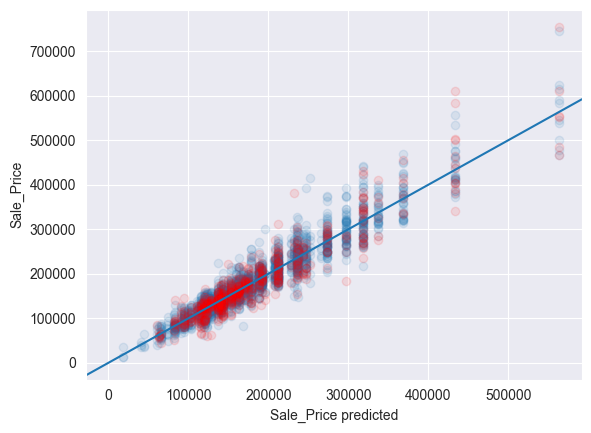

In [45]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Bagging

Nel tentativo di ottenere performance migliori applichiamo il metodo ensamble bagging

In [58]:
from sklearn.ensemble import BaggingRegressor

dt = DecisionTreeRegressor(criterion='squared_error', max_depth=60, max_leaf_nodes=70, min_samples_leaf=3, min_samples_split=3)
boosted_dt = BaggingRegressor(dt, n_estimators=1000)
boosted_dt.fit(X_train, Y_train.values.ravel())
test_pre = boosted_dt.predict(X_test)
train_pre = boosted_dt.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 381453865.359
Test MSE: 667322322.204
Train R^2: 0.936
Test R^2: 0.917


Text(0, 0.5, 'Sale_Price')

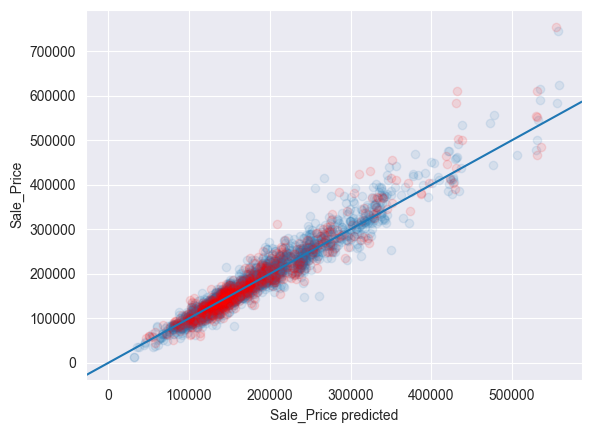

In [59]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

# Boosting

Nel tentativo di ottenere performance migliori applichiamo il metodo ensamble boosting

In [56]:
from sklearn.ensemble import AdaBoostRegressor

dt = DecisionTreeRegressor(criterion='squared_error', max_depth=60, max_leaf_nodes=70, min_samples_leaf=3, min_samples_split=3)
boosted_dt = AdaBoostRegressor(dt, n_estimators=1000)
boosted_dt.fit(X_train, Y_train.values.ravel())
test_pre = boosted_dt.predict(X_test)
train_pre = boosted_dt.predict(X_train)

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 202663831.567
Test MSE: 539039645.350
Train R^2: 0.966
Test R^2: 0.933


Text(0, 0.5, 'Sale_Price')

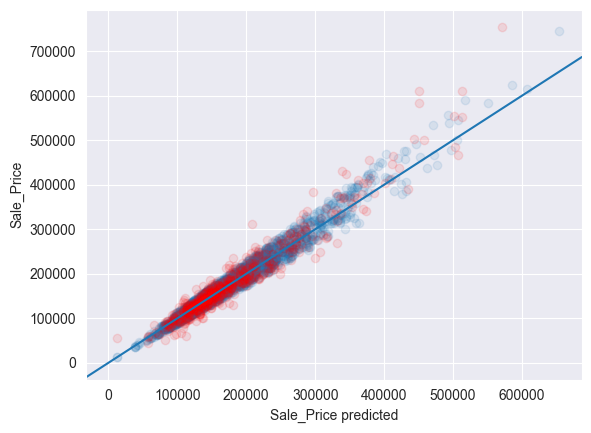

In [57]:
fig, axs = plt.subplots()

axs.plot(np.exp(train_pre), np.exp(Y_train), 'o', alpha=0.1)
axs.plot(np.exp(test_pre), np.exp(Y_test), 'o', alpha=0.1, c="red")
axs.axline((0, 0), slope=1)
axs.set_xlabel('Sale_Price predicted')
axs.set_ylabel('Sale_Price')

## Proviamo a ridurre le features usando quelle ricavate nel notebook data-engineering

In [55]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=60, max_leaf_nodes=70, min_samples_leaf=3, min_samples_split=3)
boosted_dt = AdaBoostRegressor(dt, n_estimators=1000)
boosted_dt.fit(X_train[FS_DT], Y_train.values.ravel())
test_pre = boosted_dt.predict(X_test[FS_DT])
train_pre = boosted_dt.predict(X_train[FS_DT])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 231752311.263
Test MSE: 556066298.476
Train R^2: 0.961
Test R^2: 0.931


In [54]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=60, max_leaf_nodes=70, min_samples_leaf=3, min_samples_split=3)
boosted_dt = AdaBoostRegressor(dt, n_estimators=1000)
boosted_dt.fit(X_train[FS_RF], Y_train.values.ravel())
test_pre = boosted_dt.predict(X_test[FS_RF])
train_pre = boosted_dt.predict(X_train[FS_RF])

print("Train MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_train),
                                                     y_pred=np.exp(train_pre)))))

print("Test MSE: {:.3f}".format((mean_squared_error(y_true=np.exp(Y_test),
                                                    y_pred=np.exp(test_pre)))))

print("Train R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_train),
                                           y_pred=np.exp(train_pre)))))

print("Test R^2: {:.3f}".format((r2_score(y_true=np.exp(Y_test),
                                          y_pred=np.exp(test_pre)))))

Train MSE: 204867858.091
Test MSE: 517090809.994
Train R^2: 0.966
Test R^2: 0.936
